Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas.
Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos

Objetivo:
Avaliar qual animal (cachorro ou gato) deve estar
em um vídeo de campanha de adoção

Experimento:
500 pessoas que não possuem animais de estimação assistem aos vídeos
de campanha de adoção. Os vídeos são idênticos com exceção dos animais
mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Resposta:
"Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?


# Carregamento das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Análise descritiva do dataframe

In [2]:
#lendo o arquivo csv
df = pd.read_csv("C:\\Users\\vanes\\Documents\\Vanessa_PED_EBA\\github_EBA\\EBA-aula04-ParaCasa\\data\\cachorro_gato.csv")

A coluna grupo refere- se se a pessoa viu o video de cachorro ou de gato. 0 é cachorro e 1 é gato.

Escore é probabilidade da pessoa adotar um pet após ver o vídeo

In [3]:
# vizualizando o dataframe

df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


**Observação!**

Antes de iniciarmos nossa análise, há uma coluna no DataFrame chamada "Unnamed: 0", como há valores nela contidos, que podem atrapalhar o nosso teste.

Como esta coluna em si, não traz nenhuma informação pertinente e trata-se de um índice do nosso dataframe, você pode eliminar esta coluna, e seguir com o teste de hipótese.

Se você optar por eliminar essa coluna, basta seguir as etapas:


**1** - Elimine a coluna Unnamed: 0

In [4]:
#Eliminando a coluna Unnamed: 0

df = df.drop('Unnamed: 0', axis=1)

**2 -** Verificando se ocorreu tudo certo com a eliminação da coluna 'Unnamed: 0'

In [5]:
#Lendo o dataframe apos o drop

df.head()

,grupo,escore
0,1,59.853433
1,0,66.353529
2,1,56.495813
3,0,67.995090
4,1,70.434375


Queremos entender como os grupos (0: cachorro e 1: gato) se comportam. Portand«to vamos agrupar os dados de acordo com o grupo e calcular as principais estatísticas.

In [6]:
# principais estatísticas agrupadas de acordo com o grupo.

df.groupby('grupo').describe()

escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

Vemos aqui que a média e mediana do escore de quem viu um vídeo de gato é ligeiramente maior do que quem viu vídeo de cahcorro.


### Histograma por grupo

Mostrando como está a distribuição de cada um dos grupos

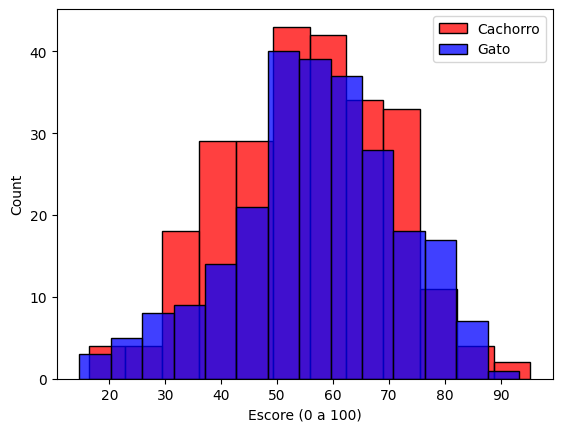

In [7]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Cachorro', color = "red") #histograma grupo que viu o video de cachorro
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Gato', color="blue")  #histograma grupo que viu o video de gato
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

O histograma acima mostra que as distribuições são muito semelhantes. Como ambas seguem aproximadamente uma normal, vamos fazer um teste de hipótese para ver qual média é maior.

O teste de hipótese escolhido deve ser para média, com 2 amostras independentes (quem viu vídeo de cachorro só viu cachorro e quem viu video de gato só viu de gato).
Como não temos o desvio-padrão da população, podemos usar o teste t.

# Comparação entre os grupos por teste-t independente

Vamos comparar as médias dos escores dos dois grupos. São estatisticamente diferentes?

In [8]:
# Importando a função que realiza o teste-t para amostras independentes

from scipy.stats import ttest_ind


In [9]:
# a função retorna uma tupla. O primeiro valor é o valor do t e o segundo é o p-value

ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

TtestResult(statistic=np.float64(-0.9166663411409343), pvalue=np.float64(0.35976119585131083), df=np.float64(498.0))

In [10]:
#organizando a tupla para denominar cada um dos valores

t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

In [11]:
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


O nosso p-valor aqui foi de aproximadamente 0.36.

Estabelecendo o nível de significância como 5%, como p > 0,05, não temos evidencias suficientes para rejeitar a hipótese nula. Logo, dizemos que estatatisticamente as médias são iguais.


# Sumário


#### Testes de Hipóteses:

1. **Teste T para amostras independentes e desvio padrao desconhecido:**


- Cálculo do t-score e p_value (respectivamente):

  ```python
  t, pvalue = ttest_ind(valores_amostra_1, valores_amostra_1)
  ```

2. **Formatação de String:**

   ```python
   print('nome_1=%.3f, nome_2=%.3f' % (variavel_1, variavel_2))
   ```
- String de formatação: 'nome_1=%.3f, nome_2=%.3f' é uma string que contém texto literal e marcadores de posição para valores numéricos. Os marcadores de posição %.3f são substituídos pelos valores de t e pvalue.

- Operador %: O operador % é utilizado para formatar a string, substituindo os marcadores de posição pelos valores correspondentes de variavel_1 e variavel_2.

- .3f : determina a quantidade de casas decimais que queremos que apareça no resultado e que o valor será formatado como ponto flutuante (float).